Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data loading

In [2]:
def load_data():
    df = pd.read_csv("data/superstore.csv", encoding="latin1")
    return df


def load_data_modified():
    df = pd.read_csv("data/superstore_modified.csv", encoding="latin1")
    return df

Preprocessing

In [3]:
def preprocess(df):
    df = df.copy()

    df["Order Date"] = pd.to_datetime(df["Order Date"])
    df["Ship Date"] = pd.to_datetime(df["Ship Date"])

    df["target"] = (df["Profit"] > 0).astype(int)

    df.dropna(inplace=True)

    return df

EDA

In [4]:
def eda(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x="target", data=df)
    plt.title("Profit Distribution (0 = Loss, 1 = Profit)")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Sales", y="Profit", data=df)
    plt.title("Sales vs Profit")
    plt.show()

Train-test split

In [5]:
def split_data(df):
    X = df[["Sales", "Quantity", "Discount"]]
    y = df["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test

Model training

In [6]:
def train_models(X_train, X_test, y_train, y_test):
    results = {}

    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)
    results["Decision Tree"] = (
        accuracy_score(y_train, dt.predict(X_train)),
        accuracy_score(y_test, dt.predict(X_test))
    )

    rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    rf.fit(X_train, y_train)
    results["Random Forest"] = (
        accuracy_score(y_train, rf.predict(X_train)),
        accuracy_score(y_test, rf.predict(X_test))
    )

    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train, y_train)
    results["Logistic Regression"] = (
        accuracy_score(y_train, lr.predict(X_train)),
        accuracy_score(y_test, lr.predict(X_test))
    )

    return results

Plot results

In [7]:
def plot_results(results):
    models = list(results.keys())
    train_acc = [results[m][0] for m in models]
    test_acc = [results[m][1] for m in models]

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(10,6))
    plt.bar(x - width/2, train_acc, width, label="Train Accuracy")
    plt.bar(x + width/2, test_acc, width, label="Test Accuracy")

    plt.ylabel("Accuracy")
    plt.title("Superstore Model Comparison")
    plt.xticks(x, models)
    plt.ylim(0,1)
    plt.legend()
    plt.tight_layout()
    plt.show()

FULL PIPELINE (Original dataset)

In [8]:
def superstore_pipeline_original():
    start = time.time()

    df = load_data()
    clean = preprocess(df)
    eda(clean)

    X_train, X_test, y_train, y_test = split_data(clean)
    results = train_models(X_train, X_test, y_train, y_test)
    plot_results(results)

    end = time.time()
    print(f"Pipeline (original) time: {end - start:.2f} seconds")

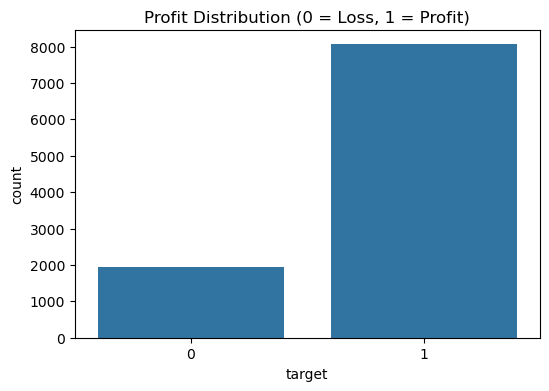

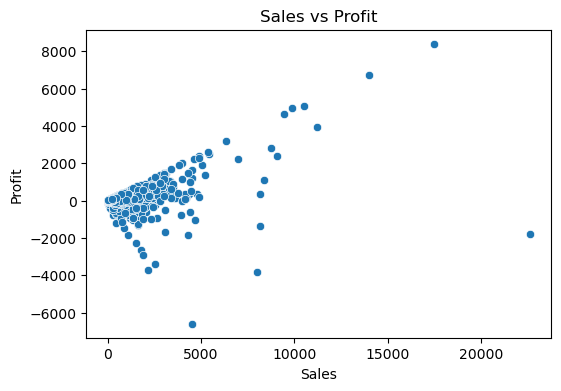

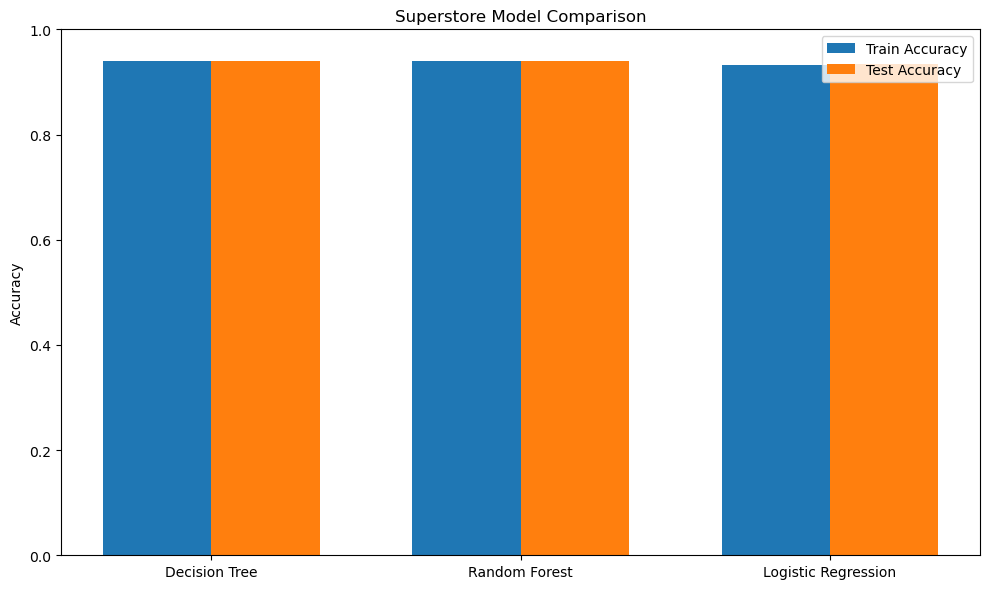

Pipeline (original) time: 2.80 seconds


In [9]:
superstore_pipeline_original()

FULL PIPELINE (Modified dataset)

In [10]:
def superstore_pipeline_modified():
    start = time.time()

    df = load_data_modified()
    clean = preprocess(df)
    eda(clean)

    X_train, X_test, y_train, y_test = split_data(clean)
    results = train_models(X_train, X_test, y_train, y_test)
    plot_results(results)

    end = time.time()
    print(f"Pipeline (modified) time: {end - start:.2f} seconds")

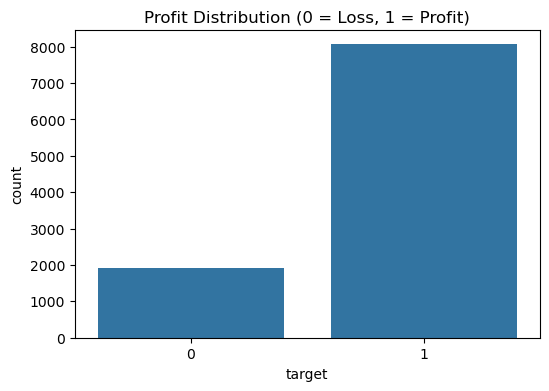

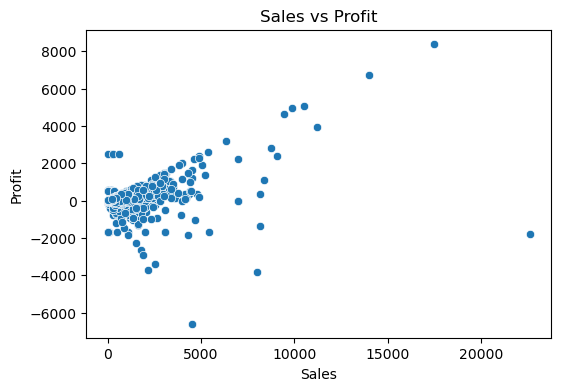

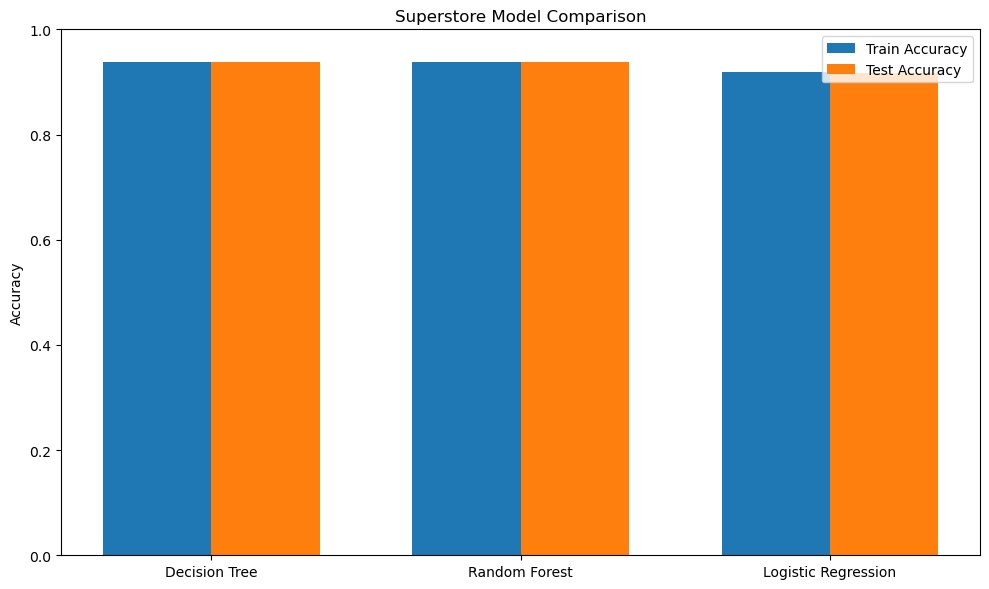

Pipeline (modified) time: 2.33 seconds


In [11]:
superstore_pipeline_modified()